In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time
import random

from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.datasets import make_blobs

import nltk
from nltk import word_tokenize, pos_tag, sent_tokenize
from nltk.collocations import *

import warnings
warnings.filterwarnings('ignore', message='Polyfit*')


In [ ]:
"""
**********************************************Q1: Mushroom Dataset*************************************************************
"""

In [198]:
""" Q1: Mushroom Dataset

Step 1: Read in data.

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

"""

col = ["target"]
# Set the colum names with numbers as string, so that it is easy to check up the column with the meaning above. 
for i in range(1,23):
    col.append(str(i))

# Read the csv:
df = pd.read_csv("mushroom.data", names = col)
df.head(8)

,target,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m


In [199]:
""" Q1:

Step 2: Clean the data

From the description obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names:
"Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute #11."

Meaning that we only need to drop "?" from column 11. 

"""
print("Orginal Shape: {}".format(df.shape))


# Check the string: I found '?' in there, which cannot be converted to numeirc. 
index_list = df['11'].index[df['11'] == '?'].tolist()
#print("Index that containing special characters:\n{}".format(index_list))
print()

# Drop the rows with index_list generated above. 
df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Shape after dropping ?: {}".format(df.shape))

Orginal Shape: (8124, 23)

Shape after dropping ?: (5644, 23)


In [200]:
""" Q1:

Step 3: Logistic classifier with 10-folds' cross validation.


"""

# Data columns: "1" to "23"
data_col = []
for i in range(1,23):
    data_col.append(str(i))

X = df[data_col]
y = df['target']

# Dict_Vectorize the X: 
dict_data = X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = y

start = time.time() # Set time start
classifier = linear_model.LogisticRegression()
# Fit the model with all samples, in preparation for the cross validation and AIC BIC.
classifier.fit(X, y)
end = time.time() # Stop timing

# 10-fold Cross Validation
scores = cross_val_score(classifier, X, y, cv=10)

print("Logistic Classifier takes: ", end-start, "seconds")
print()
print("Average Accuracy from 10-fold cross validation: {}".format(np.mean(scores)))


Logistic Classifier takes:  0.04691648483276367 seconds

Average Accuracy from 10-fold cross validation: 0.975133214920071


In [201]:
""" Q1:

Step 4: Naive Bayesian: Bernoulli

"""

# Data columns: "1" to "23"
data_col = []
for i in range(1,23):
    data_col.append(str(i))

X = df[data_col]
y = df['target']

# Dict_Vectorize the X: 
dict_data = X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = y

start = time.time()
NB = BernoulliNB()
NB.fit(X, y)
end = time.time()

print("Naive Bayes Multinomial Classifier takes: ", end-start, "seconds")

scores = cross_val_score(NB, X, y, cv=10)
print()
print("Average Accuracy for 10-folds cross validation = %.4f" % np.mean(scores))
print()


Naive Bayes Multinomial Classifier takes:  0.029743194580078125 seconds

Average Accuracy for 10-folds cross validation = 0.9199



In [205]:
""" Q1:

Step 5: Contingency Tables

"""
# Testing and training sizes:
test = 500
train = len(y)-500

# Split the train and test.
X_train = X[:train]
X_test = X[-test:]

y_train = y[:train]
y_test = y[-test:]

#Logistic confusion matrix:
classifier.fit(X_train, y_train)

# Predict for confusion matrix.
y_pred = classifier.predict(X_test)

# Print out the confusion matrix.
print("Confusion Matrix for Logistic Regression:\n%s" % metrics.confusion_matrix(y_test, y_pred, labels=["p", "e"]))
print()

#Logistic confusion matrix:
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Print out the confusion matrix.
print("Confusion Matrix for NB:\n%s" % metrics.confusion_matrix(y_test, y_pred, labels=["p", "e"]))

Confusion Matrix for Logistic Regression:
[[377  44]
 [ 30  49]]

Confusion Matrix for NB:
[[393  28]
 [ 24  55]]


In [ ]:
"""
**********************************************Q2: Baby Names********************************************************************
"""

In [6]:
""" Q2: a.

Step 1:

"""
np.random.seed(0)

# Loading packages
from nltk.corpus import names
#nltk.download("names")

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])

# For random selection
random.shuffle(labeled_names)

# 4 features: 1. last letter; 2. first letter; 3. length; 4. one letter appears twice
def gender_features(word):
    return {'last_letter': word[-1], 'first_letter': word[1], 'length': len(word), 'double': len(list(word))==len(set(word))}

# Compile features sets:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

# Build up a nltk NB classifier: first 500 as testing, and last 500 as training
train_set, test_set = featuresets[-500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Accuracy scores:
print("Accuracy Score: {}".format(nltk.classify.accuracy(classifier, test_set)))
print()

n = 10
n_features = classifier.show_most_informative_features(10)
#print(n_features)

# Try "Neo":
print(classifier.classify(gender_features('Neo')))

Accuracy Score: 0.748

Most Informative Features
             last_letter = 'd'              male : female =     11.4 : 1.0
             last_letter = 'i'            female : male   =      8.0 : 1.0
             last_letter = 's'              male : female =      5.6 : 1.0
            first_letter = 'd'            female : male   =      3.9 : 1.0
             last_letter = 'r'              male : female =      3.8 : 1.0
             last_letter = 'm'              male : female =      3.6 : 1.0
             last_letter = 'l'              male : female =      3.0 : 1.0
            first_letter = 's'              male : female =      2.7 : 1.0
             last_letter = 't'              male : female =      2.3 : 1.0
                  length = 10               male : female =      2.1 : 1.0
male


In [7]:
""" Q2: b.


"""
# Read in csv I generated:
roster = pd.read_csv('class.csv')

# Just need the first name and sex for now
# And they need to be stored as the format as: ('Jane', 'female')
students = []
for i in range(len(roster['fname'])):
    temp = (roster['fname'][i], roster['sex'][i])
    students.append(temp)
    
#print(students)

features = [(gender_features(n), gender) for (n, gender) in students]

# Accuracy scores:
print("Accuracy Score: {}".format(nltk.classify.accuracy(classifier, features)))


Accuracy Score: 0.4666666666666667


In [8]:
""" Q2: c.

What should be noticed here is that:
I need to make sure the test sets and training sets in both NB and logistic should be the same.

"""
# Build up a nltk NB classifier: first 500 as testing, and last 500 as training.
train_set, test_set = featuresets[-500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Accuracy scores:
print("Accuracy Score for NB from NLTK package: %.4f" %nltk.classify.accuracy(classifier, test_set))
print()


# Build up a logistic classifier with the same training and testing sets:
# This is guaranteed by splitting the X and y with the exactly same mechanisms: first 500 as testing, and last 500 as training.

gender = []
for i in range(len(labeled_names)):
    if featuresets[i][1] == 'female':
        g = 0
    else:
        g = 1
    gender.append(g)
sex = Series(gender)

feature_dict = []
for i in range(len(labeled_names)):
    feature_dict.append(featuresets[i][0])
#sex = Series(gender)
#print(dir(feature_dict))

ll = []
fl = []
l = []
d = []
for e in range(len(feature_dict)):
    ll.append(feature_dict[e]["last_letter"])
    fl.append(feature_dict[e]["first_letter"])
    l.append(feature_dict[e]["length"])
    d.append(feature_dict[e]["double"])

data = {'last_letter': ll,
       'first_letter': fl,
       'length': l,
       'double': d}

df = DataFrame(data)
#df.head(8)

# Independent data:
X_original = df
dict_data = X_original.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

X = pd.DataFrame(vectorizer.fit_transform(dict_data))

X_train = X[-500:]
X_test = X[:500]

# Target.
y_train = sex[-500:]
y_test = sex[:500]

# Create a logistic regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Accuracy scores:
print("Accuracy score for Logistic Regression: %.4f" %accuracy_score(y_test, y_pred))
print("Contigency Table: \n{}".format(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])))
print()

# BernoulliNB:
NB = BernoulliNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)
print("Accuracy score for Bernoulli NB: %.4f" %accuracy_score(y_test, y_pred))
print("Contigency Table: \n{}".format(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])))


Accuracy Score for NB from NLTK package: 0.7480

Accuracy score for Logistic Regression: 0.7580
Contigency Table: 
[[269  44]
 [ 77 110]]

Accuracy score for Bernoulli NB: 0.7460
Contigency Table: 
[[267  46]
 [ 81 106]]


In [9]:
""" Q2: d

Step 1: Vary the size of the training set from 100 to 2000 in increments of 100. 
For each increment, fit a Naïve Bayes classifier and a Logistic Regression classifier. 

"""

# Prepare X for logistic classifier:
X_original = df
dict_data = X_original.T.to_dict().values()
X = pd.DataFrame(vectorizer.fit_transform(dict_data))

# Set loop:
nltkNB = []
log = []
BerNB = []
n = (2000-100)/100
size_lst = []
size = 0
for i in range(int(n)+1):
    size += 100
    size_lst.append(size_lst)
    
    # Build up a nltk NB classifier: first 500 as testing, and last 500 as training.
    train_set, test_set = featuresets[-size:], featuresets[:500]
    classifier = nltk.NaiveBayesClassifier.train(train_set)

    # Build up a logistic regression:
    # Independent data:
    X_train = X[-size:]
    X_test = X[:500]

    # Target.
    y_train = sex[-size:]
    y_test = sex[:500]

    # Create linear regression object
    regr = linear_model.LogisticRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    # BernoulliNB:
    NB = BernoulliNB()
    NB.fit(X_train, y_train)

    y_predNB = NB.predict(X_test)

    # Accuracy scores:
    #print("Accuracy score for NLTK NB, Logistic Regression and BernoulliNB are: {}, {}. {}".format(
        #nltk.classify.accuracy(classifier, test_set), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_predNB)))
    
    # Create arrays for plotting:
    nltkNB.append(accuracy_score(y_test, y_pred))
    log.append(nltk.classify.accuracy(classifier, test_set))
    BerNB.append(accuracy_score(y_test, y_predNB))

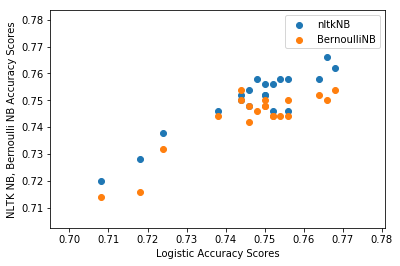

In [10]:
""" Q2: d.

Step 2: Plot or tabulate the accuracy of each classifier. 
What can you conclude about the relative performance of NB vs. MaxEnt classifiers as the size of the training set increases?

"""

plt1 = plt.scatter(log, nltkNB)
plt2 = plt.scatter(log, BerNB)
#plt3 = plt.scatter(size_lst, log)
#plt.xlim(0.745, 0.7475)
plt.ylabel('NLTK NB, Bernoulli NB Accuracy Scores')
plt.xlabel('Logistic Accuracy Scores')
plt.legend((plt1,plt2), ("nltkNB", "BernoulliNB"))
plt.show()

In [ ]:
"""
*************************************************Q3: Pima diabetes dataset **************************************************
"""

In [286]:
""" Q3:

Step 1: Read in data.

According to the definitions, all the features are numeric, and "target" is binary.

"""

df=pd.read_csv('pima.data', sep=',',
                names = ["num", "glucose", "bp", "tricep", "insulin", "mass", "pedigree", "age", "target"])

df.head(8)

,num,glucose,bp,tricep,insulin,mass,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [288]:
""" Q3:

Step 2: Clean data

"""

df.isnull().any()

num         False
glucose     False
bp          False
tricep      False
insulin     False
mass        False
pedigree    False
age         False
target      False
dtype: bool

In [323]:
""" Q3:

Step 3: Fit several logistic regression models and (Gaussian) naïve Bayes models,
to the Pima diabetes dataset from the UCI machine learning repository, varying training set size from 10 to 500 in units of 10. 

"""
from sklearn.utils import shuffle

#Shuffle: to make sure it is randomly picked for testing and training.
np.random.seed(0)
df = shuffle(df)

# Prepare columns:
col = ["num", "glucose", "bp", "tricep", "insulin", "mass", "pedigree", "age"]

# Prepare the right format for NB: 
# A labeled_data will be look like: 
#({'num': 6.0, 'glucose': 148.0, 'bp': 72.0, 'tricep': 35.0, 'insulin': 0.0, 'mass': 33.6, 'pedigree': 0.627, 'age': 50.0}, 1)
dict_df = X_original.T.to_dict()
labeled_data = []
for i in range(len(dict_df)):
    pair = (dict_df[i], df["target"][i])
    labeled_data.append(pair) 
    
# Prepare the right format for logistic regression:
X_original = df[col]
y = df["target"]

# Set loop:
nltkNB = []
log = []
Gaussian = []
n = (500-10)/10
size_lst = []
size = 0
for i in range(int(n)+1):
    size += 10
    size_lst.append(size) # For further plotting purpose.
    
    # Build up an NLTK NB classifier: first 200 as testing.
    train_set, test_set = labeled_data[-size:], labeled_data[:200]
    classifier = nltk.NaiveBayesClassifier.train(train_set)

    # Build up Logistic and GaussianNB:
    # Independent data:
    X_train = X[-size:]
    X_test = X[:200]

    # Target.
    y_train = y[-size:]
    y_test = y[:200]

    # Build up a GassianNB classifier: 
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    #y_pred_clf = clf.predict(X_test)
    
    # Create linear regression object:
    regr = linear_model.LogisticRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # Accuracy scores:
    print("Accuracy score for NLTK NB: {},\nAccuracy score for Logistic Classifier: {}".format(
        nltk.classify.accuracy(classifier, test_set),accuracy_score(y_test, y_pred)))
    print("Accuracy score for GaussianNB Classifier: {}".format(clf.score(X_test, y_test)))
    print("******************************************************")
    print()
    
    # Create arrays for plotting:
    nltkNB.append(accuracy_score(y_test, y_pred))
    log.append(nltk.classify.accuracy(classifier, test_set))
    Gaussian.append(clf.score(X_test, y_test))

Accuracy score for NLTK NB: 0.41,
Accuracy score for Logistic Classifier: 0.58
Accuracy score for GaussianNB Classifier: 0.615
******************************************************

Accuracy score for NLTK NB: 0.59,
Accuracy score for Logistic Classifier: 0.58
Accuracy score for GaussianNB Classifier: 0.625
******************************************************

Accuracy score for NLTK NB: 0.555,
Accuracy score for Logistic Classifier: 0.615
Accuracy score for GaussianNB Classifier: 0.615
******************************************************

Accuracy score for NLTK NB: 0.565,
Accuracy score for Logistic Classifier: 0.625
Accuracy score for GaussianNB Classifier: 0.61
******************************************************

Accuracy score for NLTK NB: 0.59,
Accuracy score for Logistic Classifier: 0.64
Accuracy score for GaussianNB Classifier: 0.61
******************************************************

Accuracy score for NLTK NB: 0.575,
Accuracy score for Logistic Classifier: 0.61
Acc

Accuracy score for NLTK NB: 0.69,
Accuracy score for Logistic Classifier: 0.61
Accuracy score for GaussianNB Classifier: 0.59
******************************************************

Accuracy score for NLTK NB: 0.69,
Accuracy score for Logistic Classifier: 0.61
Accuracy score for GaussianNB Classifier: 0.595
******************************************************



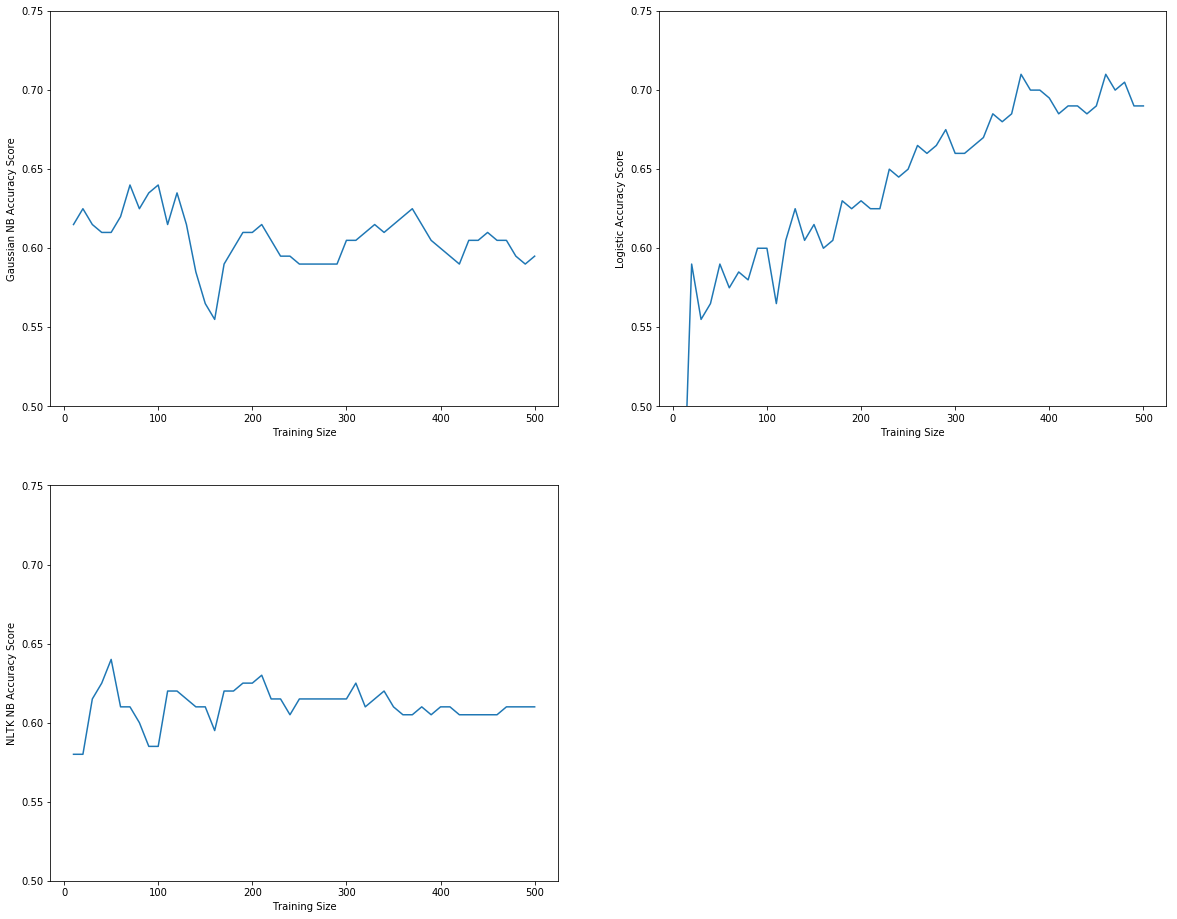

In [331]:
""" Q3:

Step 4: Create a plot comparing how average accuracy from each type model varies with training set size. 

"""

# Plot.
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.plot(size_lst, Gaussian)
ax1.set_ylim([0.5, 0.75])
ax1.set_xlabel("Training Size")
ax1.set_ylabel("Gaussian NB Accuracy Score")

ax2.plot(size_lst, log)
ax2.set_ylim([0.5, 0.75])
ax2.set_xlabel("Training Size")
ax2.set_ylabel("Logistic Accuracy Score")

ax3.plot(size_lst, nltkNB)
ax3.set_ylim([0.5, 0.75])
ax3.set_xlabel("Training Size")
ax3.set_ylabel("NLTK NB Accuracy Score")

plt.show()

In [ ]:
"""
******************************************************Q4: US SSA***************************************************************
"""

In [2]:
""" Q4: a. 

i. Develop a gender classifier using only full names as features.

Step 1: Read in data.

"""

import os
import json

name_names=os.listdir(r"C:\Users\Jane Liu\Documents\GWU Spring2018\MachineLearning\HW3\names")

names = []
age = 37

for i in range(np.size(name_names)):
    file=open("C:\\Users\\Jane Liu\\Documents\\GWU Spring2018\\MachineLearning\\HW3\\names\\"+name_names[i])
    data=[]
    
    while 1:
        tempdata=[]
        line=file.readline()
        if not line:
            break
        tempdata=line.split(',')
        data.append(tempdata)
    # Use append instead of extend here, since I want to insert age for this file, and make a dictionary.
    # Should be sth like: {"37": [["Anna","F","177"], ["Tom","M","18"]], "36": [["Anna","F","177"], ["Tom","M","18"]]}
    names.append(data) 
    
f1=open("C:\\Users\\Jane Liu\\Documents\\GWU Spring2018\\MachineLearning\\HW3\\names.txt","w")

f1.write(json.dumps(names))


47114344

In [2]:
""" Q4: a. 

i. Develop a gender classifier using only full names as features.

Step 1: Read in data.

"""

import os
import json

name_names=os.listdir(r"C:\Users\Jane Liu\Documents\GWU Spring2018\MachineLearning\HW3\simplified")

names = []
age = 37

for i in range(np.size(name_names)):
    file=open("C:\\Users\\Jane Liu\\Documents\\GWU Spring2018\\MachineLearning\\HW3\\simplified\\"+name_names[i])
    data=[]
    
    while 1:
        tempdata=[]
        line=file.readline()
        if not line:
            break
        tempdata=line.split(',')
        data.append(tempdata)
    # Use append instead of extend here, since I want to insert age for this file, and make a dictionary.
    # Should be sth like: {"37": [["Anna","F","177"], ["Tom","M","18"]], "36": [["Anna","F","177"], ["Tom","M","18"]]}
    names.append(data) 
    
"""f1=open("C:\\Users\\Jane Liu\\Documents\\GWU Spring2018\\MachineLearning\\HW3\\simplified.txt","w")

f1.write(json.dumps(names))"""


NameError: name 'np' is not defined

In [22]:
""" Q4: a.

Step 3: Add age. The way I did it will treat Age as a categorical feature other than a continuous feature,
which I think is fine in terms of the purpose of this task. 

"""
age = 37

# Get the labeled_names in right format:
labeled_names = []
for i in range(len(names)):
    for j in range(len(names[i])):
        name_sex = (names[i][j][0], names[i][j][1], age)
        labeled_names.append(name_sex)
     
    age -= 1
    
# For random selection
random.shuffle(labeled_names)

# 5 features: 1. last letter; 2. first letter; 3. length; 4. one letter appears twice; 5. age
def gender_features(word, age):
    return {'last_letter': word[-1], 'first_letter': word[1], 'length': len(word), 
            'double': len(list(word))==len(set(word)), 'age': age}

# Compile features sets:
featuresets = [(gender_features(n, age), gender) for (n, gender, age) in labeled_names]

#print(featuresets[0])

# Build up a nltk NB classifier: first 500 as testing, and last 500 as training
train_set, test_set = featuresets[-500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Accuracy scores:
print("Accuracy Score for NLTK NB: {}".format(nltk.classify.accuracy(classifier, test_set)))
print()

Accuracy Score for NLTK NB: 0.71



In [23]:
# Test with Dylan
classifier.classify(gender_features('Dylan', 21))

'M'

In [30]:
""" Q4:

Step 4: Read in class roster and test the NLTK NB accuracy. 

"""

# Read in csv I generated:
roster = pd.read_csv('class.csv')

# Just need the first name and sex for now
# And they need to be stored as the format as: ('Jane', 33)
students = []
for i in range(len(roster['fname'])):
    temp = (roster['fname'][i], roster['age'][i], roster['sex'][i])
    students.append(temp)
    
for student,age,true in students:
    print("Predicted gender for {} is {}, while the true gender is {}.".format(
        student, classifier.classify(gender_features(student,age)), true))


Predicted gender for Amal is M, while the true gender is female.
Predicted gender for Amirah is M, while the true gender is female.
Predicted gender for Philip is F, while the true gender is male.
Predicted gender for Willie is F, while the true gender is male.
Predicted gender for Ethan is F, while the true gender is male.
Predicted gender for Devin is M, while the true gender is male.
Predicted gender for Jane is F, while the true gender is female.
Predicted gender for Seamus is M, while the true gender is male.
Predicted gender for Niveditha is F, while the true gender is female.
Predicted gender for Hyuk is M, while the true gender is male.
Predicted gender for Hanting is M, while the true gender is male.
Predicted gender for Xi is M, while the true gender is male.
Predicted gender for Yiwei is F, while the true gender is male.
Predicted gender for Zhenglin is F, while the true gender is male.
Predicted gender for Mykola is F, while the true gender is male.


In [16]:
""" Q4: 

Using LapLacian Smoothing: need to go back to BernoulliNB

"""

gender = []
for i in range(len(labeled_names)):
    if featuresets[i][1] == 'F':
        g = 0
    else:
        g = 1
    gender.append(g)
sex = Series(gender)

feature_dict = []
for i in range(len(labeled_names)):
    feature_dict.append(featuresets[i][0])
#sex = Series(gender)
#print(dir(feature_dict))

ll = []
fl = []
l = []
d = []
a = []
for e in range(len(feature_dict)):
    ll.append(feature_dict[e]["last_letter"])
    fl.append(feature_dict[e]["first_letter"])
    l.append(feature_dict[e]["length"])
    d.append(feature_dict[e]["double"])
    a.append(feature_dict[e]["age"])

data = {'last_letter': ll,
       'first_letter': fl,
       'length': l,
       'double': d,
       'age': a}

df = DataFrame(data)
#df.head(8)

In [18]:
# Independent data:
X_original = df
# Dict_Vectorize the X: 
dict_data = X_original.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = vectorizer.fit_transform(dict_data)

# Target.
y = sex

# Create a NB object with LapLacian Smoothing of 1. 
NB = BernoulliNB(alpha = 1)
NB.fit(X, y)

# Accuracy scores:
print("Accuracy score for NB Regression: {}".format(NB.score(X,y)))

Accuracy score for NB Regression: 0.7622511757296333


In [19]:
""" Q4: 

What do the classifiers predict for the gender of the names “Dylan”, “Madison”, “Tyler”, and “Dana”, 
assuming that they are 21 and 30 years old, and assuming that they were born in 2015?

Method 1:

Use nltk NB classifier to determine the given names and ages.

"""

# Noted that according to the way I coded the ages, if born in 2015, the person will be 2 years old.
age_lst = [21, 30, 2]

st_names = ["Dylan", "Madison", "Tyler", "Dana"]

for ages in age_lst:
    for name in st_names:
        print("Given Name: {}\nAge: {}\nClassified as: {}".format(name, ages, classifier.classify(gender_features(name,ages))))
        print("***************************")
        print()

Given Name: Dylan
Age: 21
Classified as: M
***************************

Given Name: Madison
Age: 21
Classified as: M
***************************

Given Name: Tyler
Age: 21
Classified as: M
***************************

Given Name: Dana
Age: 21
Classified as: F
***************************

Given Name: Dylan
Age: 30
Classified as: M
***************************

Given Name: Madison
Age: 30
Classified as: M
***************************

Given Name: Tyler
Age: 30
Classified as: M
***************************

Given Name: Dana
Age: 30
Classified as: F
***************************

Given Name: Dylan
Age: 2
Classified as: M
***************************

Given Name: Madison
Age: 2
Classified as: M
***************************

Given Name: Tyler
Age: 2
Classified as: M
***************************

Given Name: Dana
Age: 2
Classified as: F
***************************



In [148]:
"""Q4
What do the classifiers predict for the gender of the names “Dylan”, “Madison”, “Tyler”, and “Dana”, 
assuming that they are 21 and 30 years old, and assuming that they were born in 2015? 

Method 2:

Use GaussianNB

"""
def gender_features(word, age):
    return {'last_letter': word[-1], 'first_letter': word[1], 'length': len(word), 
            'double': len(list(word))==len(set(word)), 'age': age}

# Noted that according to the way I coded the ages, if born in 2015, the person will be 2 years old.
age_lst = [21, 30, 2]

ll = []
fl = []
l = []
d = []
a = []

for ages in age_lst:
    students = [("Dylan", ages), ("Madison", ages), ("Tyler", ages), ("Dana", ages)]
    # Compile features sets:
    featuresets = [gender_features(n, age) for (n, age) in students]
    

    for e in range(len(featuresets)):
        ll.append(featuresets[e]["last_letter"])
        fl.append(featuresets[e]["first_letter"])
        l.append(featuresets[e]["length"])
        d.append(featuresets[e]["double"])
        a.append(featuresets[e]["age"])

data = {'last_letter': ll,
           'first_letter': fl,
           'length': l,
           'double': d,
           'age': a}

df_test = DataFrame(data)

# I appended the new features onto the original df, so that when vectorizing, the new ones can be of the same size.
examine = df.append(df_test, ignore_index=True)
#print(examine.shape)

# Independent data:
X_original = examine
# Dict_Vectorize the X: 
dict_data = X_original.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = vectorizer.fit_transform(dict_data)

# Use the NB with LapLacian Smoothing to predict:
predicted = list(NB.predict(X[-12:]))

sex_pred = []
for p in predicted:
    if p == 1:
        sex_pred.append("male")
    else:
        sex_pred.append("female")

students_names = ["Dylan", "Madison", "Tyler", "Dana", "Dylan", "Madison", "Tyler", "Dana", "Dylan", "Madison", "Tyler", "Dana"]        

df_test['pred'] = sex_pred


df_test['names'] = students_names

col = ['names', 'age', 'pred']

print(df_test[col])

      names  age    pred
0     Dylan   21    male
1   Madison   21    male
2     Tyler   21    male
3      Dana   21  female
4     Dylan   30    male
5   Madison   30    male
6     Tyler   30    male
7      Dana   30  female
8     Dylan    2    male
9   Madison    2    male
10    Tyler    2    male
11     Dana    2  female


In [ ]:
"""
************************************************Q5: Curse of Dimensionality *************************************************
"""

In [2]:
""" KNN Examples:

"""

from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)

# Leave out the last 10% and test prediction performance on these observations:
indices = np.random.permutation(len(iris_X))

# Split up the training and testing dataset.
iris_X_train = iris_X[indices[:-10]] # 10%
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# Initiate the classifier:
knn = KNeighborsClassifier()

# Fit data:
knn.fit(iris_X_train, iris_y_train) 
"""KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')"""

# Predict based on the X_test:
print(knn.predict(iris_X_test))

# True value for y:
print(iris_y_test)


[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


In [18]:
""" Linear Model Examples:

"""

# Diabetes data loading:
diabetes = datasets.load_diabetes()

# Split train and test:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

# Set Regression:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# Print coefficients, mean squeared errors, and accuracy scores
print(regr.coef_)
print(np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2))
print(regr.score(diabetes_X_test, diabetes_y_test))

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
2004.56760269
0.585075302269


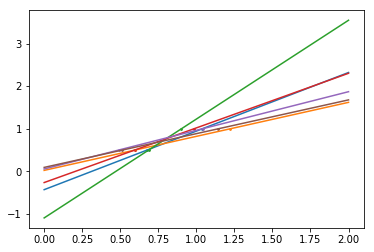

In [9]:
""" Shrinkage:
If there are few data points per dimension (This is the curse of dimentionality), noise in the observations induces high variance:
"""
# Creating arrays: by transposing
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T

# Fit linear regression.
regr = linear_model.LinearRegression()

plt.figure() 

# Make sure every time we chose the same random numbers.
np.random.seed(0)

for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  
    
plt.show()

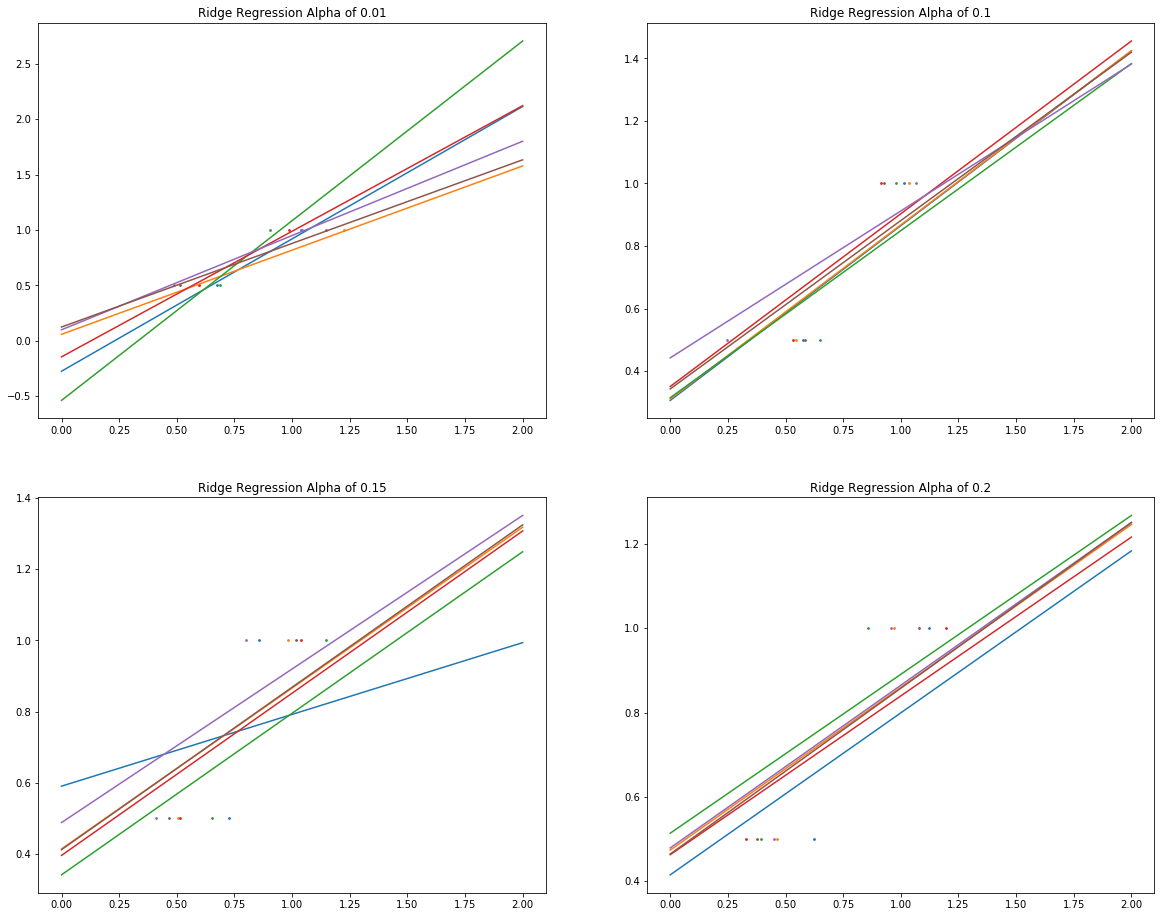

In [21]:
""" Shrinkage: Ridge Regression
 solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: 
 any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression:
 
 This is an example of bias/variance tradeoff: 
 the larger the ridge alpha parameter, the higher the bias and the lower the variance.
 To check this, plotted with different alphas. 
"""

# Fix the random chosen ones. 
np.random.seed(0)

# Set the axes to plot. 
axes = ["ax1", "ax2", "ax3", "ax4"]
# Set different alphas.
alphas = [0.01, 0.1, 0.15, 0.2]

fig = plt.figure(figsize=(20, 16))

# Plot axes.
for ax, i, a in zip(axes, range(1, 5), alphas):
    ax = fig.add_subplot(2, 2, i)
    
    for _ in range(6): 
        regr = linear_model.Ridge(alpha=a) # Ridge regression.
        this_X = .1*np.random.normal(size=(2, 1)) + X # Set X
        regr.fit(this_X, y)
        ax.plot(test, regr.predict(test)) 
        ax.scatter(this_X, y, s=3) 
        ax.set_title(("Ridge Regression Alpha of {}".format(a)))
    
plt.show()

In [22]:
"""
We can choose alpha to minimize left out error, this time using the diabetes dataset rather than our synthetic data:

"""

alphas = np.logspace(-4, -1, 6)
from __future__ import print_function

# Noted that the regr here is the Ridge Regression.
print([regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.58511106838835314, 0.58520730154446765, 0.58546775406984919, 0.58555120365039148, 0.58307170855541612, 0.57058999437280122]


In [26]:
""" Sparsity:

We can see that, although feature 2 has a strong coefficient on the full model, 
it conveys little information on y when considered with feature 1.

To improve the conditioning of the problem (i.e. mitigating the The curse of dimensionality), 
it would be interesting to select only the informative features and set non-informative ones, 
like feature 2 to 0. Ridge regression will decrease their contribution, but not set them to zero. 

Another penalization approach, called Lasso (least absolute shrinkage and selection operator), 
can set some coefficients to zero. 
Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: prefer simpler models.

"""

# Set up lasso regression
regr = linear_model.Lasso()

# Create a list of scores in alphas
scores = [regr.set_params(alpha=alpha
             ).fit(diabetes_X_train, diabetes_y_train
             ).score(diabetes_X_test, diabetes_y_test)
        for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))] # Choose the max score as the best alpha. 
regr.alpha = best_alpha # Set alpha as the best alpha, the alpha is the constant that will multiply L1.
regr.fit(diabetes_X_train, diabetes_y_train)
"""Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)"""
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


In [32]:
""" Classification:

Logistics

"""
# Logistic regression, with C=10000, and others default.
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

"""

Shrinkage and sparsity with logistic regression

The C parameter controls the amount of regularization in the LogisticRegression object: 
a large value for C results in less regularization. penalty="l2" gives Shrinkage (i.e. non-sparse coefficients), 
while penalty="l1" gives Sparsity.

"""
print("Logistic with Penalty I2 (Shrinkage):{}".format(logistic.score(iris_X_test, iris_y_test)))

# Logistic regression with penalty L1.
logistic = linear_model.LogisticRegression(C=1e5, penalty='l1')
logistic.fit(iris_X_train, iris_y_train) # Fit the training set. 

print("Logistic with Penalty I1 (Sparsity):{}".format(logistic.score(iris_X_test, iris_y_test)))

Logistic with Penalty I2 (Shrinkage):0.9
Logistic with Penalty I1 (Sparsity):0.9


In [38]:
""" Classification Exercises:

Try classifying the digits dataset with nearest neighbors and a linear model. 
Leave out the last 10% and test prediction performance on these observations.

"""

from sklearn import datasets, neighbors, linear_model

# Load digits. 
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# A random permutation, to split the data randomly
np.random.seed(0)

# Leave out the last 10% and test prediction performance on these observations
indices = np.random.permutation(len(X_digits))

# Split up the training and testing dataset.
X_digits_train = X_digits[indices[:-10]]
y_digits_train = y_digits[indices[:-10]]
X_digits_test  = X_digits[indices[-10:]]
y_digits_test  = y_digits[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# Initiate the classifier:
knn = KNeighborsClassifier()

# Fit data:
knn.fit(X_digits_train, y_digits_train) 

# Predict based on the X_test:
print(knn.predict(X_digits_test))

# True value for y:
print(y_digits_test)

# Linear Regression:
# Fit linear regression.
regr = linear_model.LinearRegression()
regr.fit(X_digits_train, y_digits_train)

print(regr.score(X_digits_test, y_digits_test))

[1 4 8 4 5 3 3 7 7 8]
[1 4 8 4 5 3 3 7 7 8]
-0.102525400273


In [37]:
""" SVM

"""
from sklearn import svm

#Perform SVC with kernel Linear
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

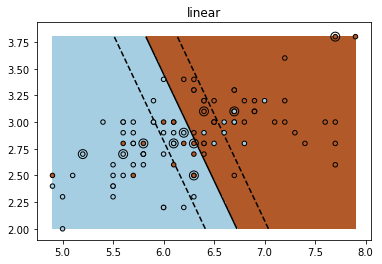

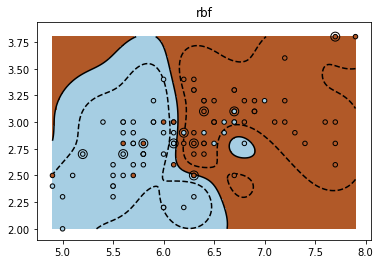

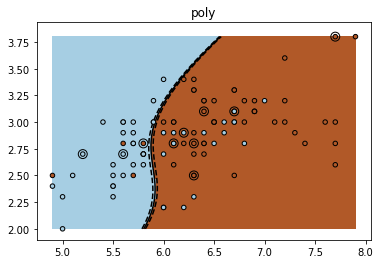

In [39]:
""" SVM Exercise:

"""

# Load Iris Data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Set X and y where y does not equal to 0
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

# Shuffle the dataset in order to choose randomly:
np.random.seed(0)
#Randomly permute n_sample
order = np.random.permutation(n_sample)
# Randomly choose xs to put in X and y.
X = X[order]
y = y[order].astype(np.float)

# Set traininng and Testing data sets:
X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model: with all kernels
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    
    # Fit SVC:
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    # Plot:
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()


In [ ]:
"""
***************************************Q6: SVM: Maximum margin separating hyperpla*********************************************
"""

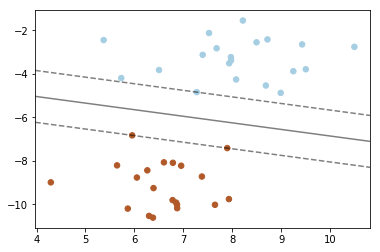

In [41]:
""" Q6: Execute each line

Plot the maximum margin separating hyperplane within a two-class separable dataset 
using a Support Vector Machine classifier with linear kernel.

"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points： Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot the scatter plot with first column and second column:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()

# get the X and y limits. 
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

# Create YY and XX for further plotting: 
YY, XX = np.meshgrid(yy, xx)

# Generate xs to calculate the decision function:
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Calculate the distance of the samples X to the separating hyperplane.
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']) # Specifying transparency with alpha = 0.5, and linestyles.
# plot support vectors:
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

In [ ]:
"""
b. Explain the concept of a maximum-margin hyperplane in your own words.

"""

"""
When constructing a hyperplane in SVM, 
the classifier is built based on the purpose to maximize the distances from support vectors to the hyperplane, from both sides. 
And that hyperplane is the maximum-margin hyperplane. 

"""

In [ ]:
"""
***********************************************Q7 Breast Cancer**************************************************************
"""

In [2]:
""" Question 7. a. 

Include all features and use them to construct a soft-margin linear SVM classifier using a standard hinge loss function. 
Using 10-fold cross-validation, what is this classifier’s accuracy? 

Step 1: Read in the dataset. 


1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

"""
read=pd.read_csv('wdbc.data', sep=',',
                names = ["ID", "Diagnosis", 
                         "radius_3", "texture_4", "perimeter_5", "area_6", "smooth_7", "compact_8", "concavity_9","con_pont_10", "sym_11", "fract_dim_12",
                        "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32"])

read.head(8)

,ID,Diagnosis,radius_3,texture_4,perimeter_5,area_6,smooth_7,compact_8,concavity_9,con_pont_10,...,23,24,25,26,27,28,29,30,31,32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510


In [3]:
""" Question 7. a. 

Include all features and use them to construct a soft-margin linear SVM classifier using a standard hinge loss function. 
Using 10-fold cross-validation, what is this classifier’s accuracy? 

step 2: Inspect the data. 

i. Type;
ii. NaNs.
iii. Categorical Levels.

Noted that only Diagnosis is a categorical data. 

"""

col = ["ID", "Diagnosis", 
                         "radius_3", "texture_4", "perimeter_5", "area_6", "smooth_7", "compact_8", "concavity_9","con_pont_10", "sym_11", "fract_dim_12",
                        "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                        "23", "24", "25", "26", "27", "28", "29", "30", "31", "32"]
# Check type:
for column in col:
    print("Type for column {}: {}".format(column, type(read[column][0])))
    
# Check NaNs.
print(read.isnull().any()) # No NAN. If there is any, comment out the following. 
print()

# Inspect categorical data:
lst = list(read['Diagnosis'])
levels = set(lst)
print("Level for Diagnosis is: \n{}".format(levels))




Type for column ID: <class 'numpy.int64'>
Type for column Diagnosis: <class 'str'>
Type for column radius_3: <class 'numpy.float64'>
Type for column texture_4: <class 'numpy.float64'>
Type for column perimeter_5: <class 'numpy.float64'>
Type for column area_6: <class 'numpy.float64'>
Type for column smooth_7: <class 'numpy.float64'>
Type for column compact_8: <class 'numpy.float64'>
Type for column concavity_9: <class 'numpy.float64'>
Type for column con_pont_10: <class 'numpy.float64'>
Type for column sym_11: <class 'numpy.float64'>
Type for column fract_dim_12: <class 'numpy.float64'>
Type for column 13: <class 'numpy.float64'>
Type for column 14: <class 'numpy.float64'>
Type for column 15: <class 'numpy.float64'>
Type for column 16: <class 'numpy.float64'>
Type for column 17: <class 'numpy.float64'>
Type for column 18: <class 'numpy.float64'>
Type for column 19: <class 'numpy.float64'>
Type for column 20: <class 'numpy.float64'>
Type for column 21: <class 'numpy.float64'>
Type for c

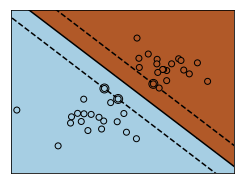

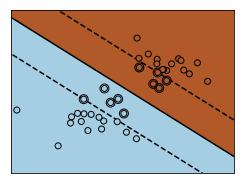

In [44]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [6]:
""" Soft-margin:

Sometimes the data are linearly separable.
But in the general case they are not, and even if they are, 
we might prefer a solution that better separates the bulk of the data while ignoring a few weird noise documents.

C = 0.5

"""
col = ["radius_3", "texture_4", "perimeter_5", "area_6", "smooth_7", "compact_8", "concavity_9","con_pont_10", "sym_11", "fract_dim_12",
                    "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                    "23", "24", "25", "26", "27", "28", "29", "30", "31", "32"]


X = read[col]
y = read['Diagnosis']

# Soft margin: set the regulation as 0.5
# Hinge loss function: a SVC normally use a hinge loss function
clf = svm.SVC(kernel='linear', C=0.5)
clf.fit(X, y)

# 10-fold Cross Validation
scores = cross_val_score(clf, X, y, cv=10)
print("10-fold cross validation scores: {}".format(scores))
print("Average accuracy:{}".format(np.mean(scores)))


10-fold cross validation scores: [ 0.98275862  0.93103448  0.92982456  0.94736842  0.98245614  0.96491228
  0.92982456  0.94642857  0.96428571  0.94642857]
Average accuracy:0.9525321925503413


In [8]:
""" Q7. c.

Use a non-linear kernel to generate classification results. 
What is this classifier’s accuracy? 
Is there another metric, besides accuracy, that would lead you to favor the classifier with the lower accuracy?

"""

# Iterate through kernels (except kernel, since this is way to time-consuming) with defult regularization:
kernels = ["linear", "rbf", "sigmoid"]

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X, y)

    # 10-fold Cross Validation
    scores = cross_val_score(clf, X, y, cv=10)
    print("Kernel {}:*******************************".format(kernel))
    print("10-fold cross validation scores: {}".format(scores))
    print("Average accuracy:{}".format(np.mean(scores)))
    print()

Kernel linear:*******************************
10-fold cross validation scores: [ 0.98275862  0.93103448  0.92982456  0.94736842  0.96491228  0.98245614
  0.92982456  0.94642857  0.96428571  0.96428571]
Average accuracy:0.9543179068360554

Kernel rbf:*******************************
10-fold cross validation scores: [ 0.62068966  0.62068966  0.63157895  0.63157895  0.63157895  0.63157895
  0.63157895  0.625       0.625       0.625     ]
Average accuracy:0.6274274047186933

Kernel sigmoid:*******************************
10-fold cross validation scores: [ 0.62068966  0.62068966  0.63157895  0.63157895  0.63157895  0.63157895
  0.63157895  0.625       0.625       0.625     ]
Average accuracy:0.6274274047186933



In [ ]:
"""
**********************************Q8: Plot different SVM classifiers in the iris dataset****************************************
"""

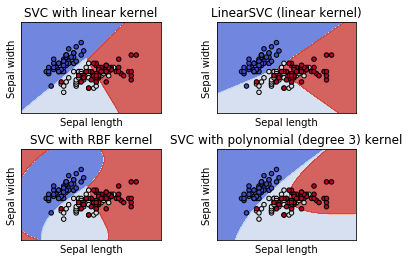

In [9]:
""" Q8:

Comment

"""

# Create a function to intake x and y with default step as 0.02, and return meshgrid.
def make_meshgrid(x, y, h=.02):
    Parameters
    ----------
    """Create a mesh of points to plot in

    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1 # Set the x and y min and max limitations.
    y_min, y_max = y.min() - 1, y.max() + 1
    
    # Define meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Create a function to take in axes, classifiers, meshgrid, to fill the contours.
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    # Use the meshgrid x and y to predict based on classifier that has been intaken:
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Reshape to make the format constant:
    Z = Z.reshape(xx.shape)
    
    # filled contours:
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target # Ceate y.

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

# Create models lists to hold svm models.
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

# Build models based on the models in the list:
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4) # Hold all graphs into onw major graph. 

# Define X0 and X1 as the first two columns. 
X0, X1 = X[:, 0], X[:, 1]

# Use function make_meshgrid to take in X0 and X1 and make meshgrid.
xx, yy = make_meshgrid(X0, X1)

# Use zip() to map together the models, titles and axes in the plot. 
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8) # Use plot_contours to fill the contours.
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k') # Plot scatter plot with the first two columns. 
    # Set x and y limitations. 
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # Set x and y labels.
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    # Set x and y ticks.
    ax.set_xticks(())
    ax.set_yticks(())
    # Set the title
    ax.set_title(title)

plt.show()

In [ ]:
"""
**********************************************Q10: Sentiment Labeled Sentences*************************************************
"""

In [31]:
import os
import json

sentences_file=os.listdir(r"C:\Users\Jane Liu\Documents\GWU Spring2018\MachineLearning\HW3\sentences")

data1 = pd.read_csv(sentences_file[0], sep="\n", delimiter="\t", names=["text", "sentiment"])
data2 = pd.read_csv(sentences_file[1], sep="\n", delimiter="\t", names=["text", "sentiment"])
data3 = pd.read_csv(sentences_file[2], sep="\n", delimiter="\t", names=["text", "sentiment"])

df=data1.append([data2, data3])

df.head(8)

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1


In [32]:
""" Shuffle, since the file is merged with files in order.

"""
from sklearn.utils import shuffle
np.random.seed(0)
df = shuffle(df)
df.head(8)

,text,sentiment
53,They have horrible attitudes towards customers...,0
590,10/10,1
634,Ordered burger rare came in we'll done.,0
699,"Anyways, The food was definitely not filling a...",0
147,This is actually a very smart movie.,1
231,"Oh yeah, and the storyline was pathetic too.",0
5,"The rest of the movie lacks art, charm, meanin...",0
195,"Light weight, I hardly notice it is there.",1


In [33]:
""" Count Vectorize the documents:

"""

# Define test and train sizes:
test_size = 500
train_size = len(df['text']) - test_size

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), binary=True)
documents = count_vectorizer.fit_transform(df['text'])

# X:
train_X = documents[:train_size][:]
test_X = documents[-test_size:][:]

# y:
train_y = df['sentiment'].iloc[:train_size]
test_y = df['sentiment'].iloc[-test_size:]

In [34]:
""" BernoulliNB:

"""
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB().fit(documents,df['sentiment'])

#classifier.predict(count_vectorizer.transform(["not good"]))
print("Accuracy score for BernoulliNB: {}".format(classifier.score(documents,df['sentiment'])))

Accuracy score for BernoulliNB: 0.985080058224163


In [35]:
""" TF-idf weighting for NB:
 
"""

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfid = vectorizer.fit_transform(df['text'])

tfid_NB = BernoulliNB().fit(tfid,df['sentiment'])

#tfid_NB.predict(vectorizer.transform(["no good"]))
print("Accuracy score for BernoulliNB after tf-idf: {}".format(tfid_NB.score(tfid,df['sentiment'])))

Accuracy score for BernoulliNB after tf-idf: 0.9399563318777293


In [100]:
""" Linear_regression:

With a cut-off threshold at 0.5.

"""

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_X)

y_binary = []
for y in y_pred:
    if y < 0.5:
        y_binary.append(0)
    else:
        y_binary.append(1)
        

# The accuracy: I used MSE to measure since this is an OLS model. accuracy_score() cannot handle mix of continuous and binary variables. 
print("MSE for OLS-based Binary Classification, threshold of 0.5:\n{}".format(mean_squared_error(test_y, y_binary)))
print()
print("R2 for OLS-based Binary Classification, threshold of 0.5:\n{}".format(r2_score(test_y, y_binary)))
print()


MSE for OLS-based Binary Classification, threshold of 0.5:
0.332

R2 for OLS-based Binary Classification, threshold of 0.5:
-0.33743695515557803



In [101]:
""" Logistic_regression:

"""

# Create a logistic regression object
logregr = linear_model.LogisticRegression()

# Train the model using the training sets
logregr.fit(train_X, train_y)

# Make predictions using the testing set
y_pred = logregr.predict(test_X)

# Accuracy scores:
print("Accuracy score for Logistic Regression: {}".format(accuracy_score(test_y, y_pred)))


Accuracy score for Logistic Regression: 0.836


In [105]:
""" SVM:

"""

from sklearn import datasets, svm, metrics

clf = svm.SVC(gamma=0.001)
clf.fit(train_X, train_y)

y_pred = clf.predict(test_X)
# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (clf, metrics.classification_report(test_y, y_pred)))



Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.47      1.00      0.64       229
          1       1.00      0.03      0.06       271

avg / total       0.76      0.47      0.32       500




0.742180827922


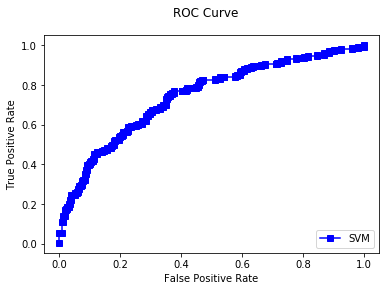

In [107]:
""" ROC:

"""

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = clf.decision_function(test_X)

false_positive, true_positive, thresholds = metrics.roc_curve(test_y, y_score)
# Notice we are only using the True Y label, Not the Predicted Y label

print(metrics.auc(false_positive, true_positive))

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
"""
********************************************Q11 Thoracic Surgery Data***********************************************************
"""

In [36]:
""" Step 1: Load data

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1) 
2. PRE4: Forced vital capacity - FVC (numeric) 
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric) 
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0) 
5. PRE7: Pain before surgery (T,F) 
6. PRE8: Haemoptysis before surgery (T,F) 
7. PRE9: Dyspnoea before surgery (T,F) 
8. PRE10: Cough before surgery (T,F) 
9. PRE11: Weakness before surgery (T,F) 
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) 
11. PRE17: Type 2 DM - diabetes mellitus (T,F) 
12. PRE19: MI up to 6 months (T,F) 
13. PRE25: PAD - peripheral arterial diseases (T,F) 
14. PRE30: Smoking (T,F) 
15. PRE32: Asthma (T,F) 
16. AGE: Age at surgery (numeric) 
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 

Target: 17

"""
import arff
from sklearn.model_selection import GridSearchCV

# Load dataset as dict:
dataset = arff.load(open('ThoraricSurgery.arff', 'r'))
data = pd.DataFrame(dataset['data'])

data.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60.0,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51.0,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59.0,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54.0,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73.0,T
5,DGN3,2.48,1.88,PRZ1,F,F,F,T,F,OC11,F,F,F,F,F,51.0,F
6,DGN3,4.36,3.28,PRZ1,F,F,F,T,F,OC12,T,F,F,T,F,59.0,T
7,DGN2,3.19,2.50,PRZ1,F,F,F,T,F,OC11,F,F,T,T,F,66.0,T


In [37]:
""" unbiased sampling:

"""
died = 0
survived = 0
for i in range(len(data[16])):
    if data[16][i] == "T":
        died += 1
    else:
        survived += 1
        
died_df = data[data[16]=='T']
survived_df = (data[data[16]=='F']).sample(n=70)

sample = pd.concat([died_df, survived_df])
#print(sample.shape)

from sklearn.utils import shuffle

np.random.seed(0)
sample = shuffle(sample)
print(sample.shape)
sample = sample.reset_index(drop=True)
sample.head(8)

(140, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,DGN3,2.52,1.72,PRZ2,F,F,T,T,T,OC12,F,F,F,T,F,74.0,T
1,DGN3,3.08,1.72,PRZ1,F,F,F,T,T,OC12,T,F,F,T,F,58.0,T
2,DGN5,3.80,2.98,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,60.0,T
3,DGN3,4.59,3.02,PRZ2,T,F,F,T,T,OC13,F,F,F,F,F,62.0,T
4,DGN2,2.94,76.00,PRZ1,F,T,T,T,F,OC12,F,F,F,F,F,61.0,F
5,DGN3,2.44,1.96,PRZ1,F,T,T,T,F,OC13,F,F,F,F,F,60.0,T
6,DGN3,2.52,2.08,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,58.0,F
7,DGN3,2.48,1.40,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,73.0,F


In [38]:
""" Preprocessing: Unbiased sampling:

"""

"""Pre-processing of data:

1. Dictvectorize the categorical.
2. Concat numerics with categoricals. 
3. Training and Testing for SVM.

"""
data_col = list(range(3,15))
data_col.extend([0])
#print(data_col)

X = sample[data_col]
y = sample[16]

# Dict_Vectorize the X: 
dict_data = X.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))

num = [1,2,15]
# Concat numerical with the categorical:
X = pd.concat([X,sample[num]], axis=1)

# Define test and train sizes:
test_size = 30
train_size = len(sample[0]) - test_size

# X:
train_X = X[:train_size][:]
test_X = X[-test_size:][:]

# y:
train_y = y.iloc[:train_size]
test_y = y.iloc[-test_size:]

0.642857142857
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

10 fold scores are
[ 0.57142857  0.42857143  0.57142857  0.71428571  0.64285714  0.57142857
  0.42857143  0.57142857  0.78571429  0.64285714]

Average Accuracy = 0.5929

Classification report for classifier 
             precision    recall  f1-score   support

          F       0.90      0.53      0.67        17
          T       0.60      0.92      0.73        13

avg / total       0.77      0.70      0.69        30


Contingency Table for classifier 
[[ 9  8]
 [ 1 12]]

AUC: 0.6968325791855204


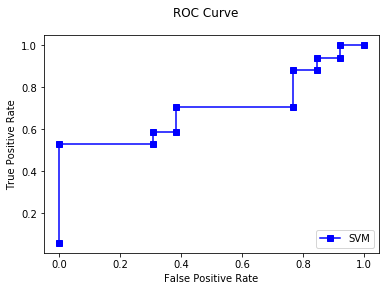

In [81]:
""" MaxEnt: Gridsearch:

"""

classifier = linear_model.LogisticRegression()

# Gridsearch parameters:
parameters = {'penalty':['l2', 'l1'], 'C':[0.1, 1, 10]}


clf = GridSearchCV(classifier, parameters)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)
print()

# Adjust the parameters for the classifier:
classifier = linear_model.LogisticRegression(penalty='l1', C=1)
classifier.fit(train_X, train_y)

scores = cross_val_score(classifier, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = classifier.predict(test_X)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(test_y, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(test_y, y_pred, labels=['F','T'])))

from sklearn.metrics import roc_curve, auc

# predicted probabilities from NB classifier:
y_score = classifier.predict_proba(test_X)
temp = pd.DataFrame(y_score)
score = np.array(temp[0])

#print(score)

false_positive, true_positive, thresholds = metrics.roc_curve(test_y, score, pos_label='F') # Set survived(F) is positive.

print("AUC: {}".format(metrics.auc(false_positive, true_positive)))

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\Anaconda3\lib\s

Best Score: 
0.6928571428571428
Best fitting model: 
BernoulliNB(alpha=0, binarize=0.0, class_prior=None, fit_prior=True)

10 fold scores are
[ 0.64285714  0.5         0.64285714  0.71428571  0.71428571  0.57142857
  0.42857143  0.64285714  0.78571429  0.71428571]

Average Accuracy = 0.6357

Classification report for classifier 
             precision    recall  f1-score   support

          F       0.77      0.59      0.67        17
          T       0.59      0.77      0.67        13

avg / total       0.69      0.67      0.67        30


Contingency Table for classifier 
[[10  7]
 [ 3 10]]

AUC: 0.6674208144796381


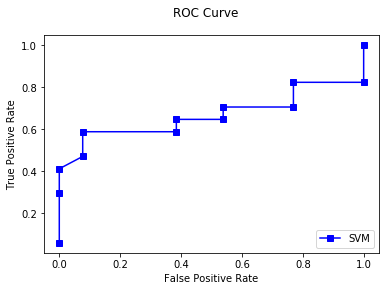

In [79]:
""" Bernoulli NB: GridSearch

"""
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()

# Gridsearch parameters:
parameters = {'alpha':[0, 1]}


clf = GridSearchCV(NB, parameters)
clf.fit(X, y)
print("Best Score: \n{}".format(clf.best_score_))
print("Best fitting model: \n{}".format(clf.best_estimator_))
print()

# Adjust the parameters for the classifier:
NB = BernoulliNB(alpha=0)
NB.fit(train_X, train_y)

scores = cross_val_score(NB, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = NB.predict(test_X)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(test_y, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(test_y, y_pred, labels=['F','T'])))

from sklearn.metrics import roc_curve, auc

# predicted probabilities from NB classifier:
y_score = NB.predict_proba(test_X)
temp = pd.DataFrame(y_score)
score = np.array(temp[0])

#print(score)

false_positive, true_positive, thresholds = metrics.roc_curve(test_y, score, pos_label='F') # Set survived(F) is positive.

print("AUC: {}".format(metrics.auc(false_positive, true_positive)))

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.635714285714
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification report for classifier SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          F       0.90      0.53      0.67        17
          T       0.60      0.92      0.73        13

avg / total       0.77      0.70      0.69        30


10 fold scores are
[ 0.57142857  0.42857143  0.5         0.71428571  0.57142857  0.57142857
  0.42857143  0.57142857  0.64285714  0.71428571]

Average Accuracy = 0.5714
Contingency Table for classifier 
[[ 9  8]
 [ 1 12]]

AUC: 0.28506787330316746


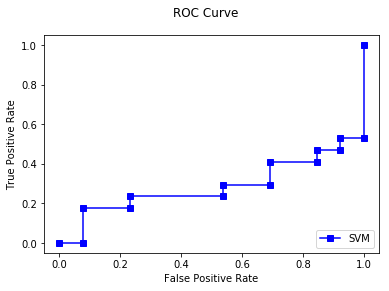

In [83]:
""" SVM: GridSearch


"""

from sklearn import datasets, svm, metrics

svr = svm.SVC()

# Gridsearch parameters:
parameters = {'kernel':['rbf', 'linear', 'sigmoid'], 'gamma':[0.0001,0.001, 0.1], 'C': [0.1,1]}


clf = GridSearchCV(svr, parameters)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)
print()


svr = svm.SVC(kernel='linear', C=0.1, gamma=0.0001)
svr.fit(train_X, train_y)

y_pred = svr.predict(test_X)
# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (svr, metrics.classification_report(test_y, y_pred)))

scores = cross_val_score(svr, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(test_y, y_pred, labels=['F','T'])))

from sklearn.metrics import roc_curve, auc

# SVR has decision function:
y_score = svr.decision_function(test_X)

false_positive, true_positive, thresholds = metrics.roc_curve(test_y, y_score, pos_label='F') # Set survived(F) is positive.
# Notice we are only using the True Y label, Not the Predicted Y label

print("AUC: {}".format(metrics.auc(false_positive, true_positive)))

fig = plt.figure()
fig.suptitle('ROC Curve')
graph = fig.add_subplot(111)
graph.plot(false_positive, true_positive, c='blue', marker="s", label="SVM")
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [143]:
"""originals = ["DGN3","DGN2","DGN4","DGN6","DGN5","DGN8","DGN1"]
news = [3,2,4,6,5,8,1]


for i in range(len(data[0])):
    for original, new in zip(originals, news):
        if data[0].iloc[i] == original:
            data[0].iloc[i] = new

data.head(8)"""

'originals = ["DGN3","DGN2","DGN4","DGN6","DGN5","DGN8","DGN1"]\nnews = [3,2,4,6,5,8,1]\n\n\nfor i in range(len(data[0])):\n    for original, new in zip(originals, news):\n        if data[0].iloc[i] == original:\n            data[0].iloc[i] = new\n\ndata.head(8)'

In [ ]:
"""
********************************************Q12: Final Project**************************************************************
"""

In [2]:
""" Q12: Read in the data and clean the data as done in HW2:

"""
df = pd.read_csv('autos.csv', sep=',', header=0, encoding='cp1252')

# Drop unuseful columns:
df.drop(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'model', 'notRepairedDamage', 'monthOfRegistration', 'dateCreated', 'nrOfPictures', 'lastSeen'], axis=1, inplace=True)

# Nans in vehivle type:
index_list = df['vehicleType'].index[df['vehicleType'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in vehicleType:\n{}".format(df.shape))


# Nans in fuel type
index_list = df['fuelType'].index[df['fuelType'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in fuelType:\n{}".format(df.shape))


# Nans in gearbox
index_list = df['gearbox'].index[df['gearbox'].isnull() == True].tolist()
# print("Index that containing special characters:\n{}".format(index_list))

df=df.drop(np.array(index_list))

# Need to reset the index, otherwise the index are gone after the drop. 
df = df.reset_index(drop=True)
print("Dataframe shape after dropping the NaNs in fuelType:\n{}".format(df.shape))


# Standardize the numerical columns:
num_col = ['price', 'powerPS', 'kilometer']
cat_col = ['yearOfRegistration']

"""for column in num_col:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column]-mean)/std"""


df[cat_col] = df[cat_col].astype(str)

df.head(8)

Dataframe shape after dropping the NaNs in vehicleType:
(333659, 9)
Dataframe shape after dropping the NaNs in fuelType:
(317768, 9)
Dataframe shape after dropping the NaNs in fuelType:
(309900, 9)


,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,postalCode
0,18300,coupe,2011,manuell,190,125000,diesel,audi,66954
1,9800,suv,2004,automatik,163,125000,diesel,jeep,90480
2,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,91074
3,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,60437
4,650,limousine,1995,manuell,102,150000,benzin,bmw,33775
5,2200,cabrio,2004,manuell,109,150000,benzin,peugeot,67112
6,0,limousine,1980,manuell,50,40000,benzin,volkswagen,19348
7,14500,bus,2014,manuell,125,30000,benzin,ford,94505


In [3]:
""" In order to perform MaxEnt and NB and such, I need to find a categorical data as the dependent variable. 

Target: 'vehicleType
Features: 'gearbox', 'powerPS', 'fuelType' and 'brand'

"""
data_col = ['gearbox', 'powerPS', 'fuelType', 'brand']

target = df['vehicleType']
data = df[data_col]

# Dict_Vectorize the X: 
dict_data = data.T.to_dict().values()

# Initiate vectorizer
vectorizer = DictVectorizer(sparse=False)

# Transform X and y: y does not need to transform. 
X = pd.DataFrame(vectorizer.fit_transform(dict_data))
y = target

# Splitting training and testing sets.
# Define test and train sizes:
test_size = 500
train_size = len(df['gearbox']) - test_size

# X:
train_X = X[:train_size][:]
test_X = X[-test_size:][:]

# y:
train_y = y.iloc[:train_size]
test_y = y.iloc[-test_size:]

In [90]:
""" MaxEnt: Gridsearch:

"""

classifier = linear_model.LogisticRegression(multi_class = "multinomial", 
                                            solver = 'lbfgs')

# Gridsearch parameters:
parameters = {'C':[0.1, 1, 10]}


clf = GridSearchCV(classifier, parameters)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)
print()

0.485146821555
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)



In [91]:
""" MaxEnt: 

"""

# Adjust the parameters for the classifier:
classifier = linear_model.LogisticRegression(multi_class = "multinomial", 
                                            solver = 'lbfgs', C=10)
classifier.fit(train_X, train_y)

scores = cross_val_score(classifier, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = classifier.predict(test_X)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(test_y, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(test_y, y_pred)))


10 fold scores are
[ 0.48298003  0.48873903  0.48252719  0.48615682  0.48418845  0.49022265
  0.48596321  0.48434979  0.48189622  0.48066869]

Average Accuracy = 0.4848

Classification report for classifier 
             precision    recall  f1-score   support

     andere       0.00      0.00      0.00         6
        bus       0.37      0.29      0.32        49
     cabrio       0.29      0.07      0.11        30
      coupe       0.00      0.00      0.00        35
 kleinwagen       0.57      0.85      0.68       111
      kombi       0.52      0.36      0.42       107
  limousine       0.46      0.64      0.53       144
        suv       0.43      0.33      0.38        18

avg / total       0.44      0.49      0.45       500


Contingency Table for classifier 
[[ 0  1  1  0  1  1  2  0]
 [ 0 14  0  0  8  9 14  4]
 [ 0  1  2  1  9  2 15  0]
 [ 0  0  0  0  3  2 30  0]
 [ 0  2  2  0 94  4  9  0]
 [ 0  8  1  0 24 38 35  1]
 [ 0 10  1  0 25 13 92  3]
 [ 0  2  0  1  1  4  4  6]]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'from sklearn.metrics import roc_curve, auc\n\n# predicted probabilities from NB classifier:\ny_score = classifier.predict_proba(test_X)\ntemp = pd.DataFrame(y_score)\nscore = np.array(temp[0])\n\n#print(score)\n\nfalse_positive, true_positive, thresholds = metrics.roc_curve(test_y, score, pos_label=\'F\') # Set survived(F) is positive.\n\nprint("AUC: {}".format(metrics.auc(false_positive, true_positive)))\n\nfig = plt.figure()\nfig.suptitle(\'ROC Curve\')\ngraph = fig.add_subplot(111)\ngraph.plot(false_positive, true_positive, c=\'blue\', marker="s", label="SVM")\nplt.legend(loc=\'lower right\')\nplt.ylabel(\'True Positive Rate\')\nplt.xlabel(\'False Positive Rate\')\nplt.show()\n'

In [98]:
""" Multinomial NB:

"""

from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()

# Gridsearch parameters:
parameters = {'alpha':[0.1, 1, 10]}

clf = GridSearchCV(NB, parameters)
clf.fit(X, y)
print("Best Score: \n{}".format(clf.best_score_))
print("Best fitting model: \n{}".format(clf.best_estimator_))
print()

Best Score: 
0.46980316231042274
Best fitting model: 
MultinomialNB(alpha=10, class_prior=None, fit_prior=True)



In [99]:
# Adjust the parameters for the classifier:
NB = MultinomialNB(alpha=10)
NB.fit(train_X, train_y)

scores = cross_val_score(NB, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))
print()

# Print the metrics report.
# Need to use training and testing sets:
y_pred = NB.predict(test_X)
print("Classification report for classifier \n%s\n" % (metrics.classification_report(test_y, y_pred)))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(test_y, y_pred)))


10 fold scores are
[ 0.46997709  0.47379969  0.46868446  0.46873185  0.46899     0.47599226
  0.47312036  0.46882865  0.4678908   0.46608146]

Average Accuracy = 0.4702

Classification report for classifier 
             precision    recall  f1-score   support

     andere       0.00      0.00      0.00         6
        bus       0.38      0.31      0.34        49
     cabrio       0.25      0.07      0.11        30
      coupe       0.29      0.06      0.10        35
 kleinwagen       0.52      0.86      0.65       111
      kombi       0.54      0.32      0.40       107
  limousine       0.44      0.56      0.49       144
        suv       0.50      0.28      0.36        18

avg / total       0.45      0.47      0.43       500


Contingency Table for classifier 
[[ 0  2  0  0  3  0  1  0]
 [ 0 15  1  0  7  9 15  2]
 [ 0  1  2  1 11  2 13  0]
 [ 0  0  0  2  6  0 27  0]
 [ 0  2  2  0 96  2  9  0]
 [ 0  8  1  0 29 34 34  1]
 [ 0 10  2  3 33 13 81  2]
 [ 0  2  0  1  1  3  6  5]]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
""" SVM: Cannot proceed since it takes too much time. 

"""

from sklearn import datasets, svm, metrics

svr = svm.SVC()

# Gridsearch parameters:
parameters = {'C': [0.1,1]}


clf = GridSearchCV(svr, parameters)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_estimator_)
print()

In [ ]:
svr = svm.SVC(kernel='linear', C=0.1, gamma=0.0001)
svr.fit(train_X, train_y)

y_pred = svr.predict(test_X)
# Print the metrics report.
print("Classification report for classifier %s\n%s\n" % (svr, metrics.classification_report(test_y, y_pred)))

scores = cross_val_score(svr, X, y, cv=10)
print("10 fold scores are")
print(scores)
print()
print("Average Accuracy = %.4f" % np.mean(scores))

# Print Contingency Table:
print("Contingency Table for classifier \n%s\n" % (metrics.confusion_matrix(test_y, y_pred, labels=['F','T'])))